# Methods and Markdown — Workbook Solutions

*Note: You can explore this [workbook](https://mybinder.org/v2/gh/INFO1350/Intro-CA-SP21/master?urlpath=lab/tree/book/COURSE-Final-Project/Workbooks/03-Methods-Markdown-WORKBOOK.ipynb) in the cloud via Binder.*

In this workbook, we're going to practice documenting code with Markdown and in-code comments. We're also going to practice describing methods in a paper, essay, or blog post.

We're going to build off our previous work tracking the word "America" in U.S. Inaugural addresses.

![](America-Inaugural-Addresses-Updated.png)

## Your Turn! — Markdown Practice

*Refer to the [Markdown cheatsheet](https://www.markdownguide.org/cheat-sheet/) for help*

Complete the following steps, and then follow the rest of the instructions below: 

- First, change the cell below to a Markdown cell
- Then make "Counting Word Frequency" an H2 header
- Then make the word "america" bolded
- Then make the word CountVectorizer code 

## Counting Word Frequency

In this section, we will count the frequency of **"america"** in the U.S. Inaugural addresses by using the scikit-learn module `CountVectorizer`.

---

Make a new Markdown cell below 👇 Then, in one sentence, describe what's happening in the code cell below 👇  by starting with the phrase "Here we..."

Here we import necessary packages and set default display settings for Pandas.

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
pd.options.display.max_rows = 200
pd.options.display.max_columns = 200
from pathlib import Path  
import glob
import matplotlib.pyplot as plt

Here we make a list of file paths for all the U.S. Inaugural addresses and a list of titles for each address, as well.

In [4]:
directory_path = "../../texts/history/US_Inaugural_Addresses/"
text_files = glob.glob(f"{directory_path}/*.txt")
text_titles = [Path(text).stem for text in text_files]

Make a new Markdown cell below 👇 Then, in one or two sentences, describe what's happening in the code cell 👇  by starting with the phrase "Here we..."

Using `CountVectorizer`, we count all the words in the addresses and make them into a DataFrame.

In [8]:
#Initialize CountVectorizer with desired parameters
count_vectorizer= CountVectorizer(input='filename',
                                  stop_words= None)

#Plug in "text_files" to the initialized count_vectorizer
word_count_vector = count_vectorizer.fit_transform(text_files)

#Make a DataFrame out of the word count vector and sort by title
word_count_df = pd.DataFrame(word_count_vector.toarray(), index=text_titles, columns=count_vectorizer.get_feature_names())
word_count_df = word_count_df.sort_index()

Here we make a bar plot of the mentions of "america" in each of the Inaugural Addresses.

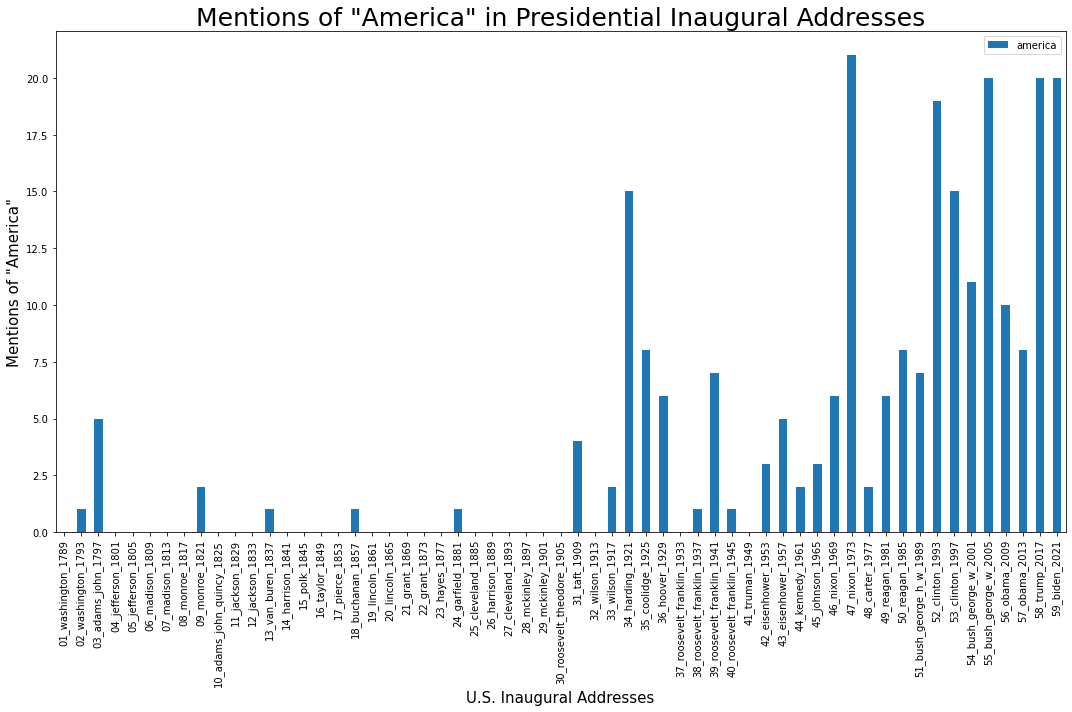

In [9]:
# Make a bar plot
ax = word_count_df.plot(y='america',
                    kind='bar',
                    figsize=(15,10))

# Insert a short description here
plt.xlabel('U.S. Inaugural Addresses', fontsize = 15)
plt.ylabel('Mentions of "America"', fontsize = 15)
plt.title('Mentions of "America" in Presidential Inaugural Addresses',
          fontsize = 25)

# Insert a short description here
plt.tight_layout()
ax.figure.savefig('America-Inaugural-Addresses-Updated.png')

## Practice Blog Post — Methodology

Above, we practiced how to document code in a Jupyter notebook. Now let's practice how we might describe the same methods in a blog post for the same project:

*To better understand how rhetoric about the nation evolved in Presidential Inaugural Addresses, we **analyzed transcripts of the addresses and examined the frequency of the word "america" over time. To calculate word frequency, we used scikit-learn's `CountVectorizer` module.***

*The figure below shows that references to "america" increased in U.S. Inaugural Addresses over time, especially increasing after 1900.*

![](America-Inaugural-Addresses-Updated.png)

*As historian Daniel Immerwahr argued in [Mother Jones](https://www.motherjones.com/politics/2019/07/when-did-the-united-states-start-calling-itself-america-anyway/), this pattern may be related to the rise of U.S. imperialism in the 20th century.*

*For example, President George Bush frequently used the word "America" in his [2005 address](https://www.presidency.ucsb.edu/documents/inaugural-address-13), which focused on how the U.S. might spread democracy around the world, implicitly referencing the ongoing "War on Terror" in the Middle East. "America's influence is not unlimited," Bush said, "but fortunately for the oppressed, America's influence is considerable and we will use it confidently in freedom's cause." In this passage, Bush directly connects America with the idea of "influence" or power abroad.*

## Bonus

To compare the frequency of one word vs another word, we can use Pandas (`kind=scatter`) or we can use the data viz library `seaborn`, which has a function `regplot` for plotting correlation as well as a line of best fit.

Pick 2 words to compare below:

In [ ]:
import seaborn as sns

#Pick 2 words to compare
word1 = 'america'
word2 = 'world'

# Set figure size (a different way of doing so since we're using seaborn)
plt.figure(figsize=(12,10))

#Use seaborn's regplot function https://seaborn.pydata.org/generated/seaborn.regplot.html
ax = sns.regplot(word_count_df[word1], word_count_df[word2])

plt.title(f'"{word1}" vs "{word2}" in U.S. Inaugural Addresses',
          fontsize = 15)

# Label each point by using ax.text with the x, y coordinates for each point
# and the label name for each point, which is stored in the DataFrame's "index"
for index, row in word_count_df.iterrows():
    ax.text(row[word1], row[word2], index)